In [ ]:
#Mounting the google drive
from google.colab import drive

drive.mount('/content/gdrive')

!pwd

Mounted at /content/gdrive
/content


In [ ]:
#Importing the libraries and modules
!pip install textblob
!pip install tweepy
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
#nltk.download('vader_lexicon')

In [ ]:
#Authrization to twitter developer site
consumerKey = "90EprMaGWemwsvrwsCm95XGuS"
consumerSecret = "yxwt3qo7VkORi1XB1Zf1rZUpmmv9JZ0nMGrf0yujSoZMFaUzCM"
accessToken = "1380810927033868295-pLFp5Q5lWxeTaBQNOOY0oJB09Wu5Gs"
accessTokenSecret = "InNwJaOWcLE6hcoR2lhXCi30rVXDK42C0GHCbiC3Odmkv"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
#Get tweets and assign probability for 3 classes positive, negative and neutral and then assign 1 class
nltk.download('vader_lexicon')
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Please enter keyword or hashtag to search: lockdown
Please enter how many tweets to analyze: 1000


In [ ]:
#Creating pandas dataframe and length of the lists
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)

print("total number of tweets: ",len(tweet_list))
print("positive tweets: ",len(positive_list))
print("negative tweets: ", len(negative_list))
print("neutral tweets: ",len(neutral_list))

print(tweet_list)

total number of tweets:  1000
positive tweets:  329
negative tweets:  229
neutral tweets:  442
                                                     0
0    RT @Pakistan_Khan99: #کپڑےنہیں_غریب_کاراشن_لو\...
1    Lockdown hair be gone ❌\n\nHow amazing is this...
2    RT @PTI_News: Rajasthan government announces "...
3    RT @aesthetiworkout: Must do these exercises t...
4    RT @AbsoluteChelsea: Breaking: #Chelsea will w...
..                                                 ...
995  RT @DrSatishPoonia: राहुल गांधी जी की तर्ज़ पर...
996  RT @Suhelseth: It’s truly a tough call: but ho...
997  tbh with you, the first lockdown worked the be...
998  @jaseybel Wala naman. Just meh week so I'm not...
999  @ada10rsh @sardesairajdeep He is the one who f...

[1000 rows x 1 columns]


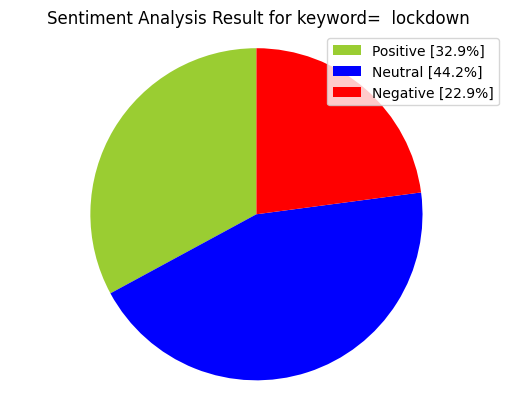

In [ ]:
#Creating pie-chart from percentages of classes
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
#Removing special characters and dataframes of 10 rows
tweet_list.drop_duplicates(inplace = True)

tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @Pakistan_Khan99: #کپڑےنہیں_غریب_کاراشن_لو\...,given the situation...
1,Lockdown hair be gone ❌\n\nHow amazing is this...,lockdown hair be gone how amazing is this b...
2,"RT @PTI_News: Rajasthan government announces ""...",rajasthan government announces strict lockdo...
3,RT @aesthetiworkout: Must do these exercises t...,must do these exercises to remain fit in lock...
4,RT @AbsoluteChelsea: Breaking: #Chelsea will w...,breaking chelsea will welcome back fans aga...
5,RT @ThanthiTV: முழு ஊரடங்கு அமல்படுத்த பரிசீலன...,...
6,RT @DaFeid: As expected.\n#SchwereSchuld \n#Bu...,as expected schwereschuld bundesnotl ge
7,"RT @tushar: When the world was in lockdown, Is...",when the world was in lockdown israel pushed...
8,RT @swati_gs: Pertinent point raised by the au...,pertinent point raised by the author why doe...
9,Mutawali e Ism e Zaat https://t.co/xIlHVvUlow ...,mutawali e ism e zaat alratv sufism tassa...


In [ ]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @Pakistan_Khan99: #کپڑےنہیں_غریب_کاراشن_لو\...,given the situation...,0.000000,0.000000,negative,0.236,0.764,0.000,-0.4019
1,Lockdown hair be gone ❌\n\nHow amazing is this...,lockdown hair be gone how amazing is this b...,0.600000,0.900000,positive,0.000,0.808,0.192,0.5859
2,"RT @PTI_News: Rajasthan government announces ""...",rajasthan government announces strict lockdo...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,RT @aesthetiworkout: Must do these exercises t...,must do these exercises to remain fit in lock...,0.400000,0.400000,positive,0.000,0.762,0.238,0.3612
4,RT @AbsoluteChelsea: Breaking: #Chelsea will w...,breaking chelsea will welcome back fans aga...,0.211111,0.411111,positive,0.000,0.842,0.158,0.4588
5,RT @ThanthiTV: முழு ஊரடங்கு அமல்படுத்த பரிசீலன...,...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,RT @DaFeid: As expected.\n#SchwereSchuld \n#Bu...,as expected schwereschuld bundesnotl ge,-0.100000,0.400000,neutral,0.000,1.000,0.000,0.0000
7,"RT @tushar: When the world was in lockdown, Is...",when the world was in lockdown israel pushed...,0.000000,0.000000,positive,0.000,0.896,0.104,0.2732
8,RT @swati_gs: Pertinent point raised by the au...,pertinent point raised by the author why doe...,0.000000,1.000000,neutral,0.000,1.000,0.000,0.0000
9,Mutawali e Ism e Zaat https://t.co/xIlHVvUlow ...,mutawali e ism e zaat alratv sufism tassa...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [ ]:
#Positive, negative and neutral tweets after removing duplicates

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

pc = count_values_in_column(tw_list,"sentiment")
print(pc)

          Total  Percentage
neutral     326       47.52
positive    195       28.43
negative    165       24.05


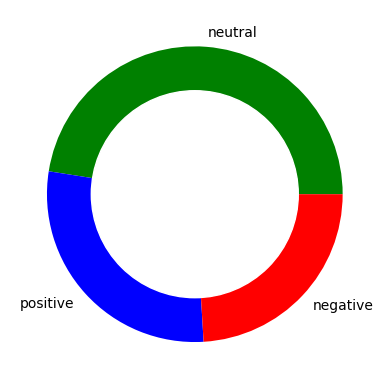

In [ ]:
#Creating pie-charts
pichart = count_values_in_column(tw_list,"sentiment")
names = pc.index
size = pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Word Cloud function
def create_wordcloud(text):
    mask = np.array(Image.open("gdrive/My Drive/Colab Notebooks/Cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


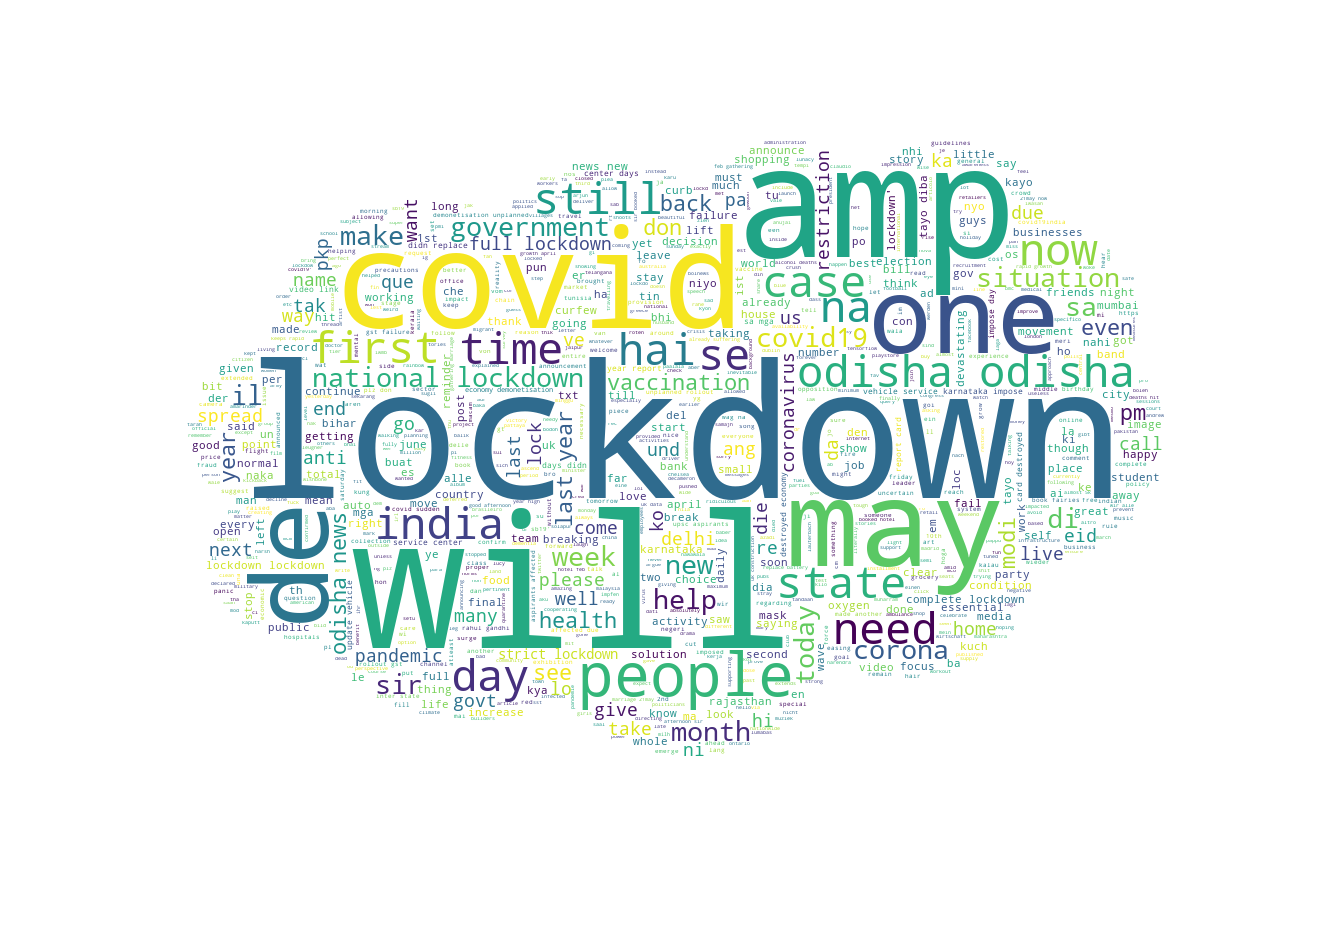

In [ ]:
#Word cloud for all words
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


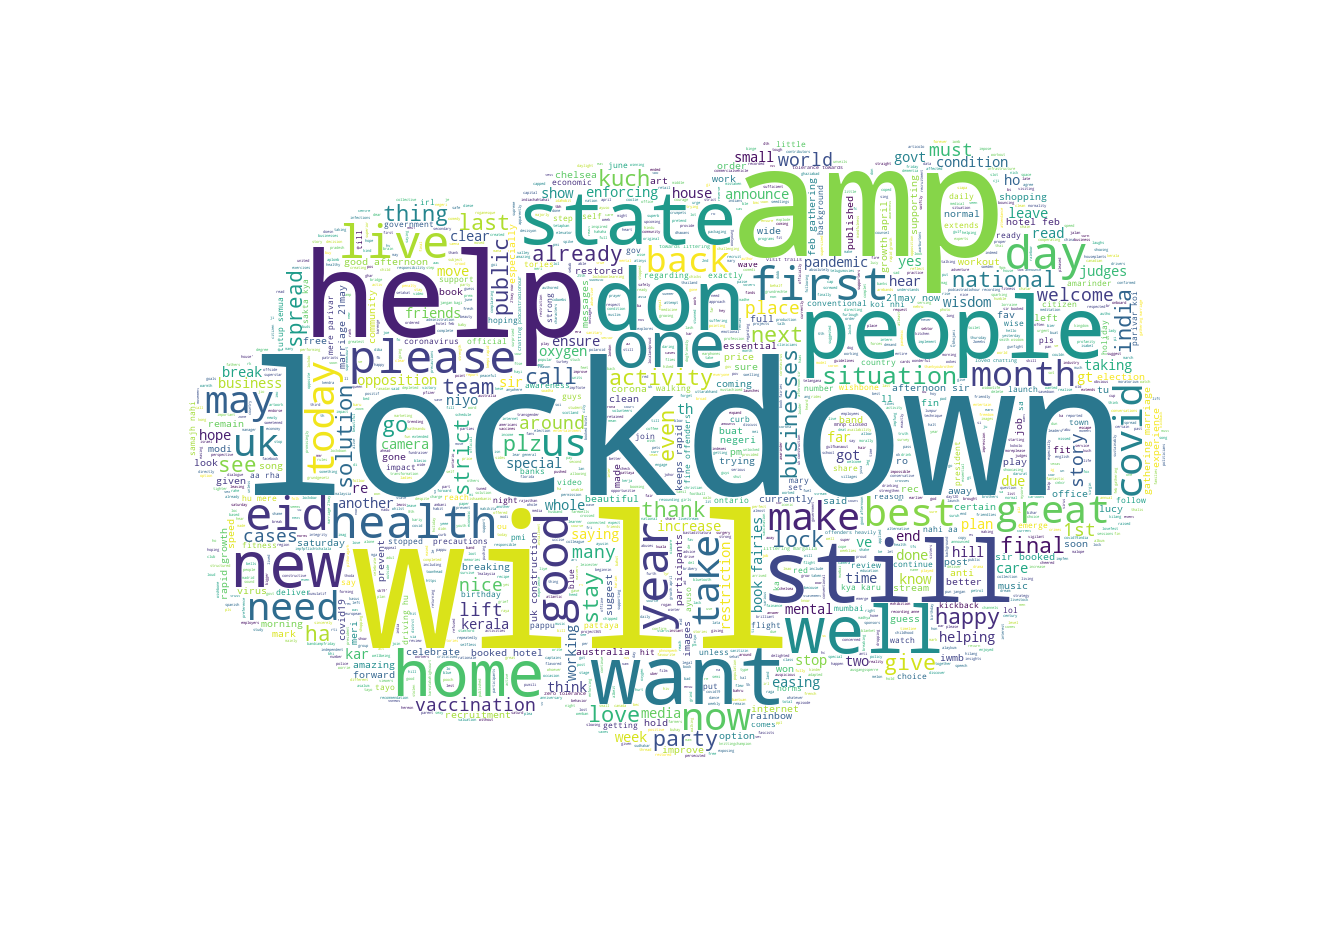

In [ ]:
#Word Cloud for positive sentiment 
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


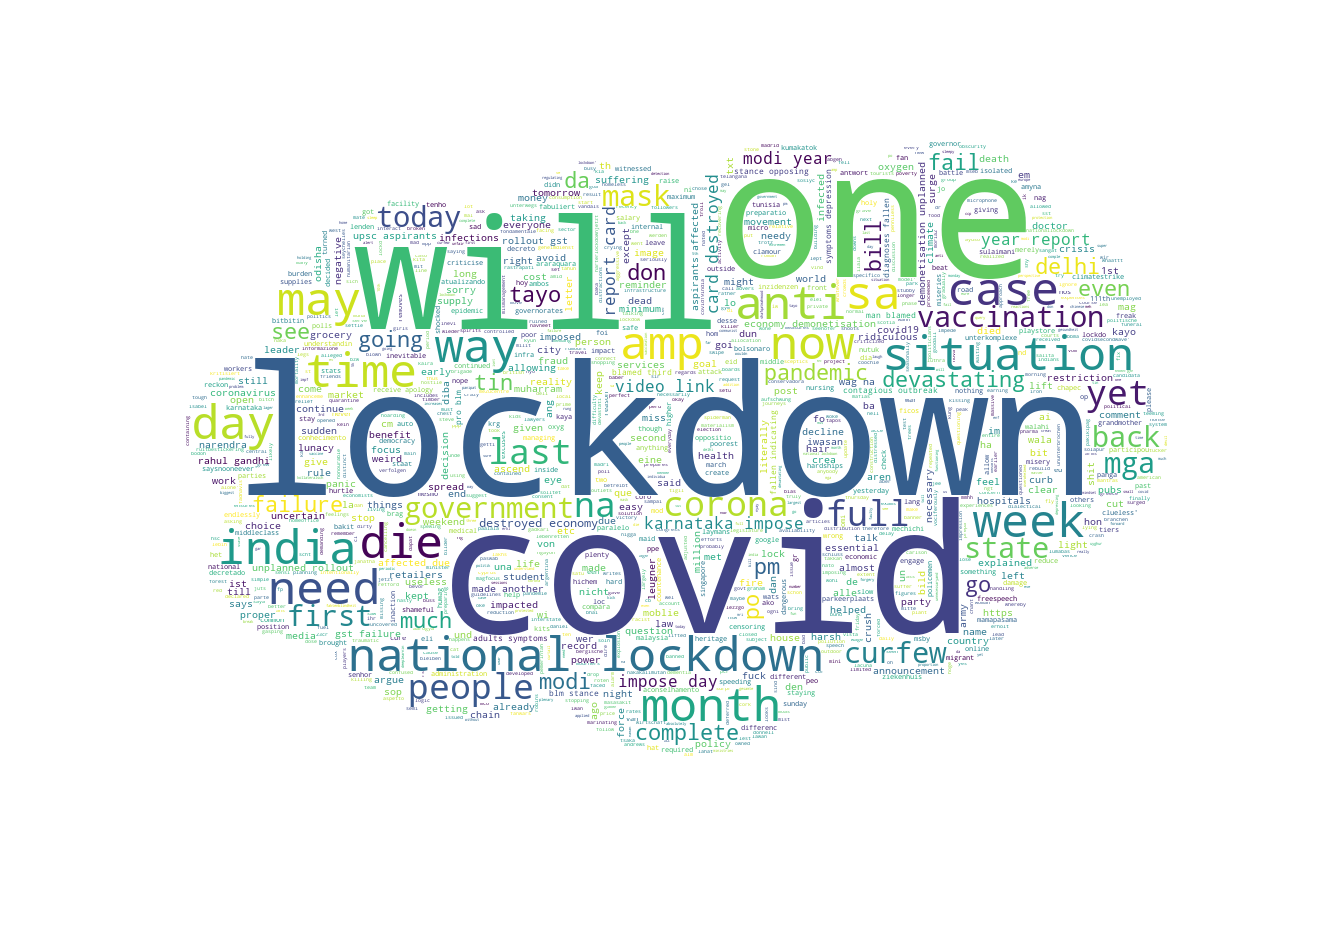

In [ ]:
#Word Cloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


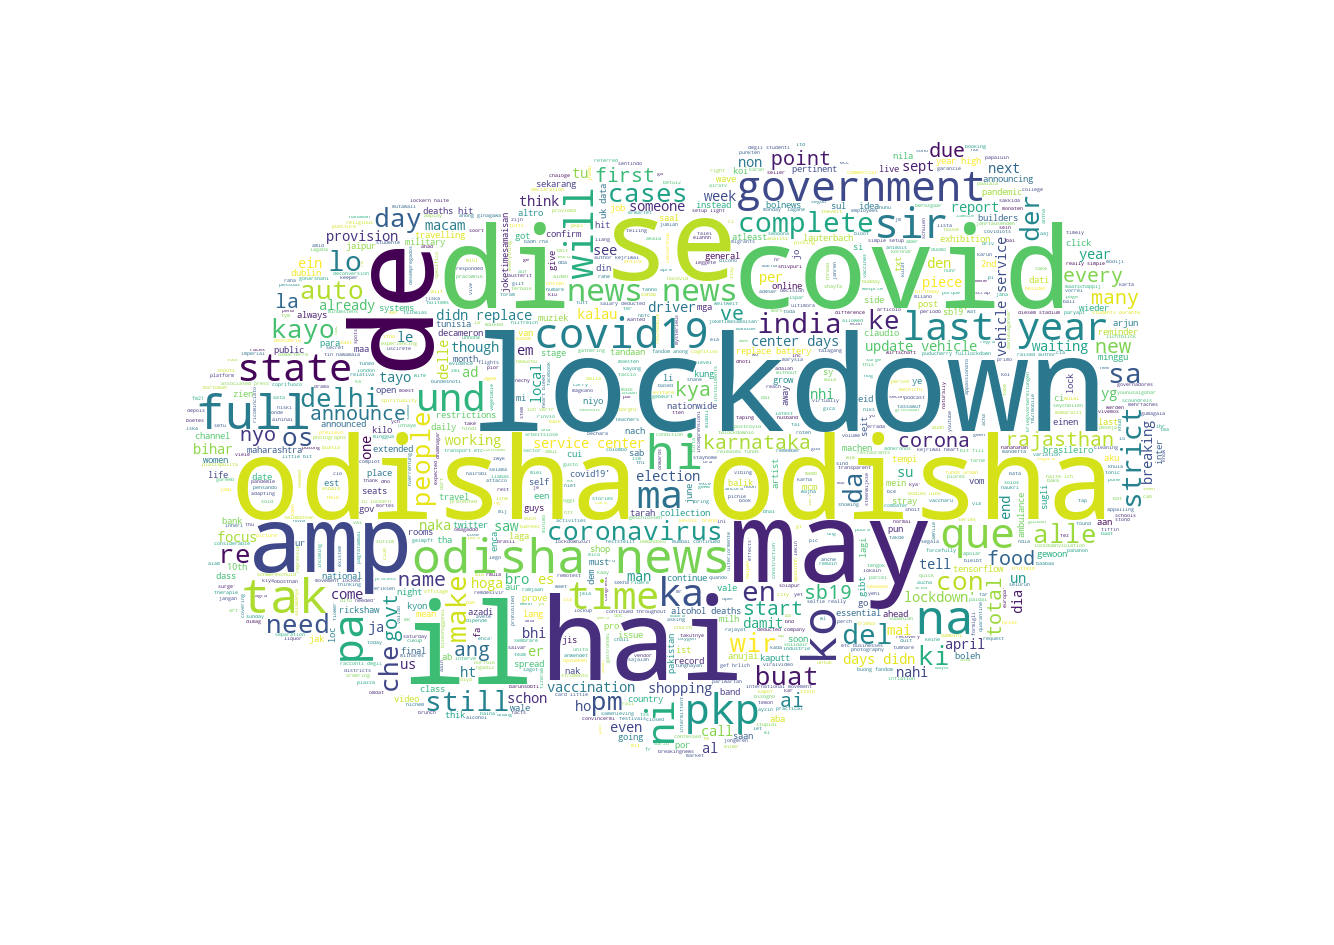

In [ ]:
#Word Cloud for negative sentiment 
create_wordcloud(tw_list_neutral["text"].values)

In [ ]:
#Text preprocessing for n-gram tasks
nltk.download('stopwords')
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

#nltk.download('stopwords')

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

tw_list.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @Pakistan_Khan99: #کپڑےنہیں_غریب_کاراشن_لو\...,given the situation...,0.000000,0.000000,negative,0.236,0.764,0.000,-0.4019,120,15,given the situation...,"[, given, the, situation, of, the, contagious,...","[, given, situation, contagious, outbreak, cov...","[, given, situat, contagi, outbreak, covid, go..."
1,Lockdown hair be gone ❌\n\nHow amazing is this...,lockdown hair be gone how amazing is this b...,0.600000,0.900000,positive,0.000,0.808,0.192,0.5859,102,18,lockdown hair be gone how amazing is this b...,"[lockdown, hair, be, gone, how, amazing, is, t...","[lockdown, hair, gone, amazing, level, tfs, st...","[lockdown, hair, gone, amaz, level, tf, studen..."
2,"RT @PTI_News: Rajasthan government announces ""...",rajasthan government announces strict lockdo...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,91,13,rajasthan government announces strict lockdo...,"[, rajasthan, government, announces, strict, l...","[, rajasthan, government, announces, strict, l...","[, rajasthan, govern, announc, strict, lockdow..."
3,RT @aesthetiworkout: Must do these exercises t...,must do these exercises to remain fit in lock...,0.400000,0.400000,positive,0.000,0.762,0.238,0.3612,52,9,must do these exercises to remain fit in lock...,"[, must, do, these, exercises, to, remain, fit...","[, must, exercises, remain, fit, lockdown, ]","[, must, exercis, remain, fit, lockdown, ]"
4,RT @AbsoluteChelsea: Breaking: #Chelsea will w...,breaking chelsea will welcome back fans aga...,0.211111,0.411111,positive,0.000,0.842,0.158,0.4588,120,18,breaking chelsea will welcome back fans aga...,"[, breaking, chelsea, will, welcome, back, fan...","[, breaking, chelsea, welcome, back, fans, lei...","[, break, chelsea, welcom, back, fan, leicest,..."


In [ ]:
#Corpus
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

print()
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

686 Number of reviews has 3015 words



,,aa,aac,aain,aaj,aan,aantal,aap,aaplay,aarogya,aata,aayi,ab,aba,aber,abgeh,abl,absolut,abus,acc,accord,account,acha,aconselhamento,act,activ,actual,ad,adalah,adapt,addit,ades,adjust,administr,adnkrono,adul,adult,adventur,adver,advers,...,workout,world,worri,would,wow,write,written,wrong,ya,yaha,ych,ye,year,yediyurappa,yeee,yeh,yehi,yesterday,yet,yg,yieeeeee,yo,younusalgohar,youth,youtub,yr,yun,yuva,zaat,zawsz,zel,zero,ziekenhui,zien,zijn,zona,zone,zoom,zu,zwyk
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Most appearing terms
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
lockdown,471
covid,48
odisha,37
amp,36
day,33
may,33
year,30
one,26
news,25
peopl,23


In [ ]:
#Getting top n gram for the sentences
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#Top 20 bigrams
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('odisha odisha', 23),
 ('national lockdown', 17),
 ('covid 19', 14),
 ('odisha news', 11),
 ('strict lockdown', 8),
 ('complete lockdown', 8),
 ('lockdown tayo', 7),
 ('anti lockdown', 7),
 ('il lockdown', 7),
 ('news news', 6),
 ('post lockdown', 5),
 ('delhi lockdown', 5),
 ('10 24', 4),
 ('14 days', 4),
 ('lockdown party', 4),
 ('total lockdown', 4),
 ('tayo diba', 4),
 ('karnataka impose', 4),
 ('impose 15', 4),
 ('15 day', 4)]

In [ ]:
#Top 20 trigrams
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('odisha odisha odisha', 11),
 ('odisha odisha news', 11),
 ('odisha news news', 6),
 ('lockdown tayo diba', 4),
 ('karnataka impose 15', 4),
 ('impose 15 day', 4),
 ('15 day lockdown', 4),
 ('update vehicle service', 4),
 ('vehicle service center', 4),
 ('service center 10', 4),
 ('center 10 days', 4),
 ('10 days didn', 4),
 ('days didn replace', 4),
 ('modi year report', 4),
 ('year report card', 4),
 ('report card destroyed', 4),
 ('card destroyed economy', 4),
 ('destroyed economy demonetisation', 4),
 ('economy demonetisation unplanned', 4),
 ('demonetisation unplanned rollout', 4)]